# Normalización y escalado - solución

A continuación estaremos trabajando con la normalización y escalado (scaling y normalization en inglés) de los datos.

Esta parte del ejercicio está compuesta por:
1. Preparación
2. Normalización vs Escalado
3. Escalado
4. Normalización

## 1 - Preparación
Antes de comenzar debemos cargar las librerías que utilizaremos para trabajar.

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats #Box-Cox Transformation
from mlxtend.preprocessing import minmax_scaling # Escalado min_max

#Para graficar
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

## 2- Normalización vs Escalado

Cuando escalamos o normalizamos datos estamos transformando los valores numéricos de las variables de forma tal que tengan algunas propiedades beneficiosas para su posterior procesamiento y análisis.

** ¿Cuál es la diferencia entre normalización y escalado? **

** Respuesta: ** En el escalado se modifica el rango de los datos mientras que en la normalización se modifica la forma de la distribución.

## 3 - Escalado

Escalado significa que transformaremos nuestros datos para que estén comprendidos en un rango específico. Los rangos más comunes son 0-1 o 0-100.

Se suele usar el escalado cuando se trabaja con [support vector machines, or SVM](https://en.wikipedia.org/wiki/Support_vector_machine) o [k-nearest neighbors, or KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). Veremos algunos de estos algoritmos más adelante.

[Se puede leer más de lo que haremos aquí](https://rasbt.github.io/mlxtend/user_guide/preprocessing/minmax_scaling/) 

> ¿Se te ocurre un ejemplo práctico de escalado?

Para ver esto de forma gráfica, comenzaremos trabajando con un conjunto de puntos elegidos al azar.

/Users/rodrigobeceiro/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Datos escalados')

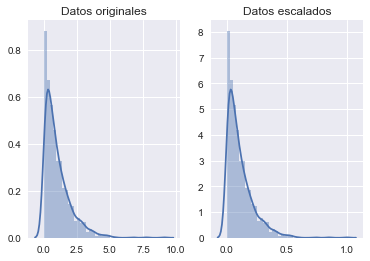

In [2]:
# Generamos 1000 puntos de forma aleatoria de una distribución exponencial
original_data = np.random.exponential(size = 1000)

# Aplicamos escalado mix-max para que quede comprendida en el rango 0-1
scaled_data = minmax_scaling(original_data, columns = [0])

# Graficamos ambos puntos
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Datos originales")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Datos escalados")

**Notar como la forma de la gráfica no cambió pero sí cambió el rango del eje de las x.**

Ahora probemos esto con datos reales. Utilizaremos los datos de las [campañas de Kickstarter](http://kickstarter.com/) del año 2017.

In [3]:
# Fijar semilla randómica
np.random.seed(0)

# Cargar datos
kickstarters = pd.read_csv("Scale and normalization/ks-projects-201801.csv")
kickstarters.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

Ahora escalar y graficar los datos de la columna 'usd_goal_real' en el rango 0-1.

/Users/rodrigobeceiro/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Datos escalados')

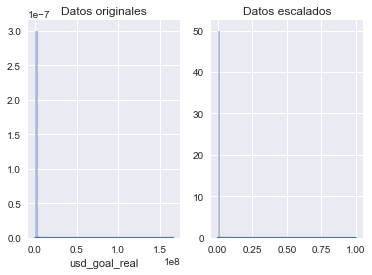

In [4]:
### SOLUCIÓN
usd_goal = kickstarters.usd_goal_real
# Escalar
scaled_data = minmax_scaling(usd_goal, columns = [0], min_val=0,max_val=1)
# Graficar
fig, ax=plt.subplots(1,2)
sns.distplot(kickstarters.usd_goal_real, ax=ax[0])
ax[0].set_title("Datos originales")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Datos escalados")

Notar como la mayoría de las campañas son de un pequeño monto y hay unas pocas de un gran monto objetivo.

## 4 - Normalización

La normalización es un cambio más radical de nuestros datos. El objetivo de la normalización de los datos es que tengan una forma más cercana a una distribución normal.

Puedes leer más de la [distribución normal o Gaussiana aquí](https://en.wikipedia.org/wiki/Normal_distribution). Ella tiene muchas propiedades matemáticas beneficiosas. Su forma es la siguiente:

/Users/rodrigobeceiro/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


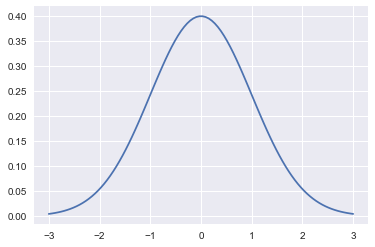

In [5]:
# Distribución normal de ejemplo
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()

Para normalizar nuestros datos utilizaremos un método llamado [Transformación Box-Cox](https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation). Primero probemoslo con datos generados por nosotros.

/Users/rodrigobeceiro/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normalized data')

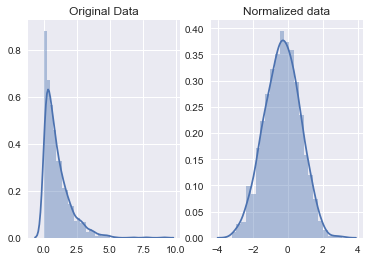

In [6]:
# Normalizar los datos generados con boxcox
normalized_data = stats.boxcox(original_data)

# Graficar
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

Notar como cambió la forma de la curva. Antes tenía una forma más parecida a una L mientras que ahora se asemeja más a una campana.

Ahora probemos con los datos de Kickstarter. Usemos los datos positivos de la columna usd_pledged_real para ello.

In [7]:
# Primero obtendremos los índices de los datos positivos
positive_index = kickstarters.usd_pledged_real > 0

# Ahora obtendremos los valores a partir de los índices
positive_vals = kickstarters.usd_pledged_real.loc[positive_index]

/Users/rodrigobeceiro/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Datos normalizados')

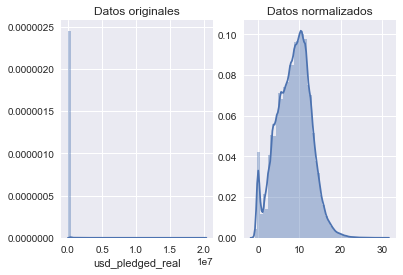

In [9]:
### SOLUCIÓN
#Normalizar
normalized_vals = stats.boxcox(positive_vals)[0]

# Graficar
fig, ax=plt.subplots(1,2)
sns.distplot(positive_vals, ax=ax[0])
ax[0].set_title("Datos originales")
sns.distplot(normalized_vals, ax=ax[1])
ax[1].set_title("Datos normalizados")

Notar como la forma de la curva ahora se parece también mucho más a una campana. Esto trae propiedades matemáticas beneficiosas para aplicar algunos algoritmos que veremos más adelante.